copyright:席灏铖 HAOCHENG XI

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

训练模型

In [65]:
file_path = "singapore data.csv"
data = pd.read_csv(file_path)

In [66]:
# 数据清洗
data.dropna(inplace=True)

# Eigenvector Engineering
# 特征工程
X = data.iloc[:, 2:] # all relative features
y = data.iloc[:, 1] # population
print(X.head())
print(y.head())

    Resident Population (Number)  Singapore Citizen Population (Number)  \
30                     2282125.0                              2194280.0   
40                     2735868.0                              2623736.0   
41                     2794704.0                              2664625.0   
42                     2849754.0                              2702430.0   
43                     2904547.0                              2742826.0   

    Permanent Resident Population (Number)  Non-Resident Population (Number)  \
30                                 87845.0                          131820.0   
40                                112132.0                          311264.0   
41                                130079.0                          340379.0   
42                                147324.0                          380944.0   
43                                161720.0                          408924.0   

    Total Population Growth (Per Cent)  Resident Population Growth (

将数据集分成训练集和测试集，用训练集来训练模型，用测试集来评估模型

In [67]:
# 将最后三行作为测试集（2020~2022）
X_train = X.iloc[:-3]
X_test = X.iloc[-3:]

y_train = y.iloc[:-3]
y_test = y.iloc[-3:]

一般情况

In [68]:
# from sklearn.model_selection import train_test_split
#
# # 数据集划分
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Mean squared error (MSE) is a common indicator used to measure the difference between predicted and actual values. The smaller the value of MSE, the more accurate the model's prediction is.

均方差（MSE）是用于衡量预测值与实际值之间差异的一种常见指标。MSE的数值越小，表示模型的预测越准确。

In [69]:
# 线性回归模型
predictModel = LinearRegression()

# 模型训练
predictModel.fit(X_train, y_train)

# 模型评估
y_predTest = predictModel.predict(X_test)
mseTest = mean_squared_error(y_test, y_predTest)
print('The mean square error (MSE) of the test data is：', mseTest)

y_predTrain = predictModel.predict(X_train)
mseTrain = mean_squared_error(y_train, y_predTrain)
print('The mean square error (MSE) of the train data is：', mseTrain)

The mean square error (MSE) of the test data is： 6.938893903907228e-18
The mean square error (MSE) of the train data is： 4.287844720862027e-18


It can be seen here that MSE is close to 0, and the situation is quite considerable

这里可见，MSE接近于0，情况比较可观

Calculate the slope and intercept, and draw the best fit line on empirical data.

计算斜率和截距，在经验数据上绘制最佳拟合线。

使用一个循环体，让每一个X_train中的元素都作为自变量和y画散点图和预测折线图，每种各画一幅图，且得出斜率和纵截距

For Feature 1: Slope = 2.05, Intercept = -2615292.19


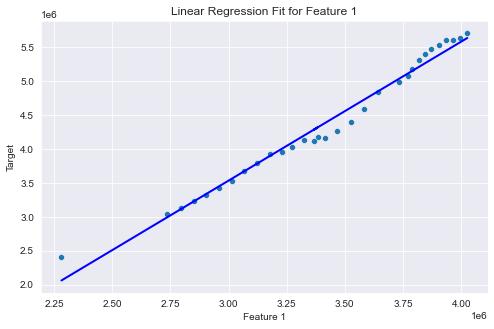

For Feature 2: Slope = 3.07, Intercept = -4989308.61


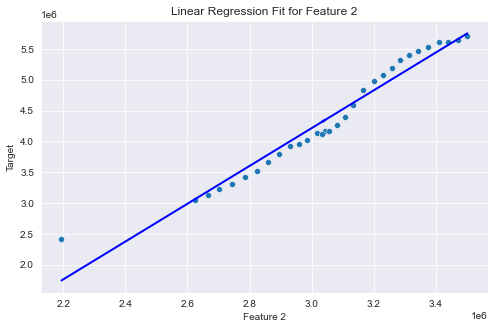

For Feature 3: Slope = 5.66, Intercept = 2340314.86


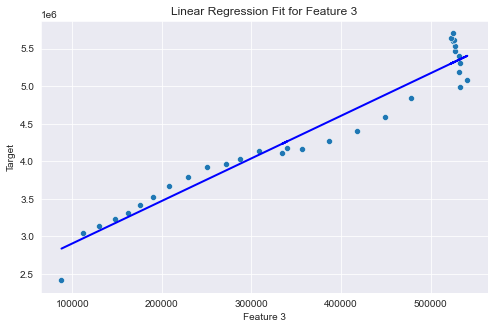

For Feature 4: Slope = 1.89, Intercept = 2554889.60


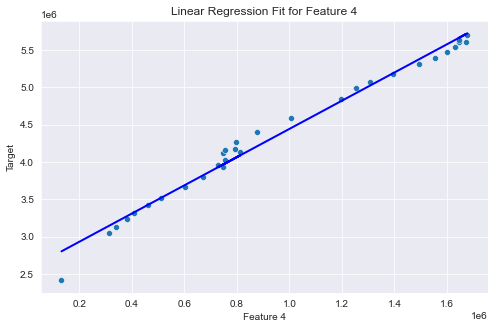

For Feature 5: Slope = -233348.64, Intercept = 4898457.48


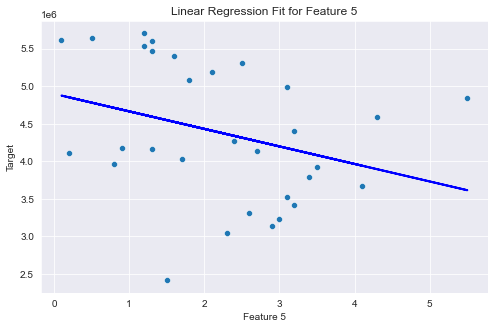

For Feature 6: Slope = -1257799.68, Intercept = 6170189.25


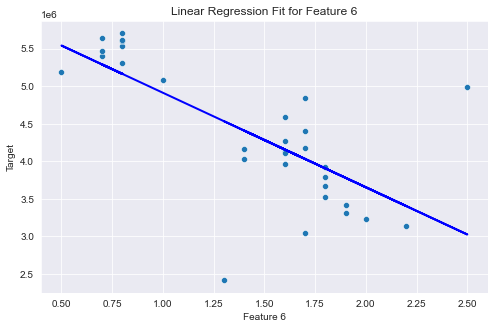

For Feature 7: Slope = 863.13, Intercept = -1106234.60


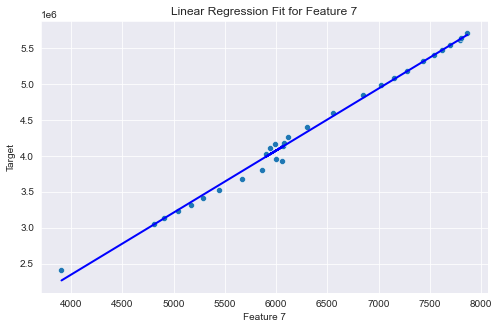

For Feature 8: Slope = -41319.03, Intercept = 45269319.89


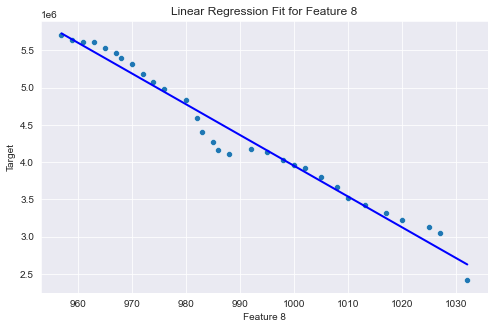

For Feature 9: Slope = 232347.93, Intercept = -3796590.25


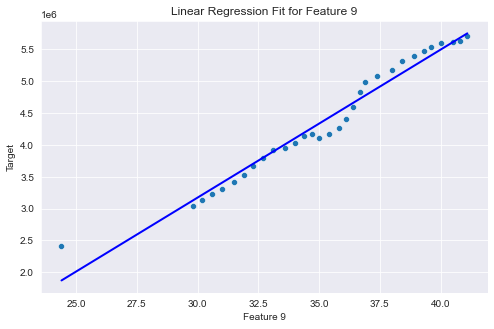

For Feature 10: Slope = 207841.33, Intercept = -3057204.58


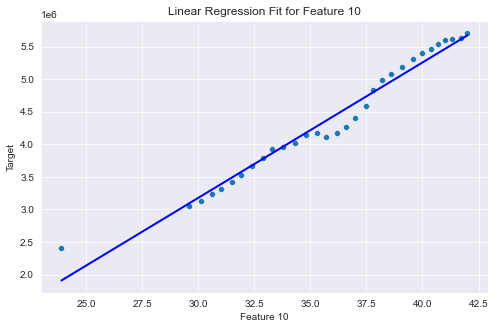

For Feature 11: Slope = -411209.77, Intercept = 8079024.79


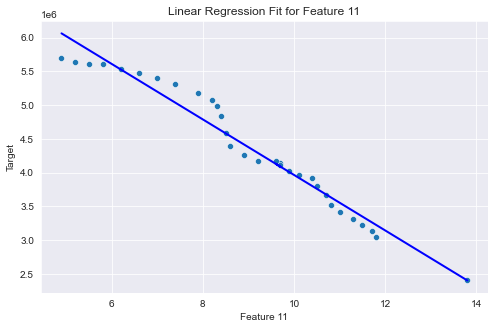

For Feature 12: Slope = -265581.46, Intercept = 14892122.77


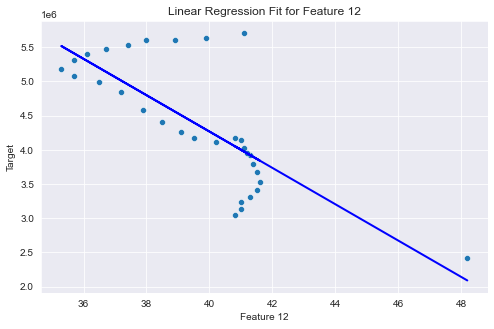

For Feature 13: Slope = -173979.82, Intercept = 9198857.40


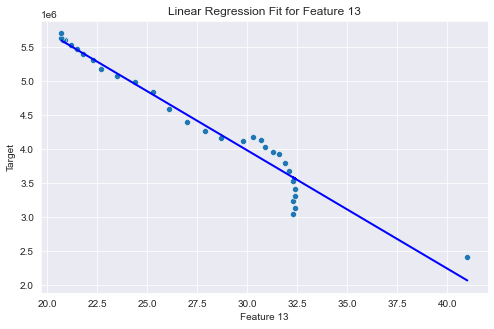

For Feature 14: Slope = 248165.01, Intercept = 1429250.49


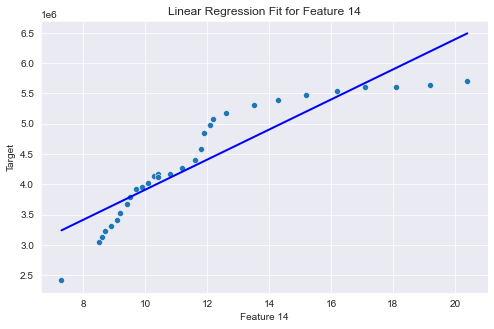

For Feature 15: Slope = -482639.84, Intercept = 8298648.27


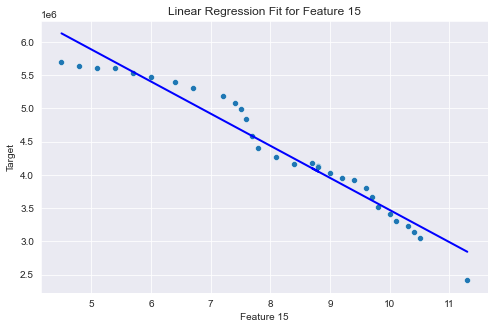

For Feature 16: Slope = -130371.70, Intercept = 11474497.81


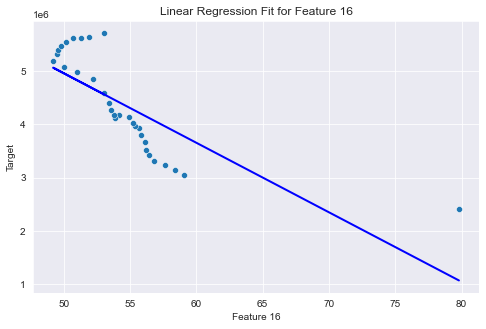

For Feature 17: Slope = -107479.45, Intercept = 8821605.67


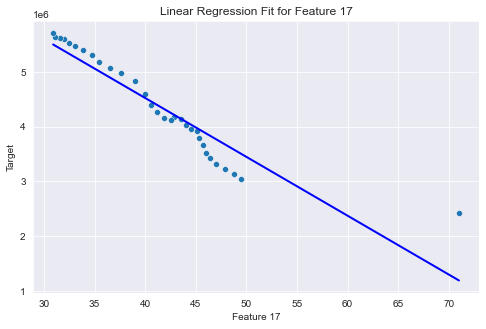

For Feature 18: Slope = 232743.96, Intercept = 1332369.23


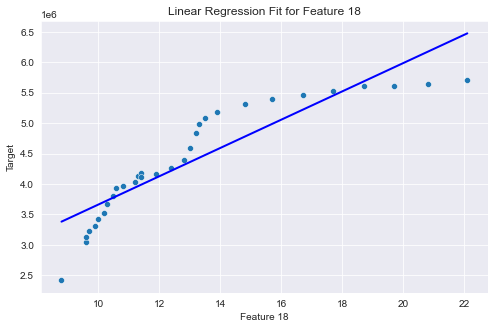

For Feature 19: Slope = -377076.52, Intercept = 7545469.53


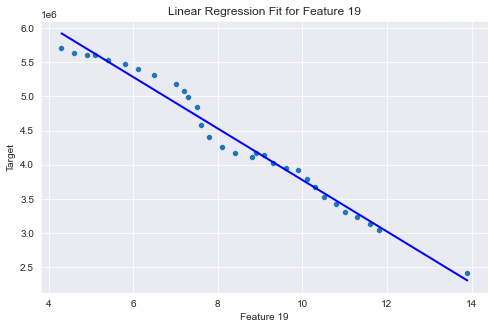

For Feature 20: Slope = -197461.16, Intercept = 12612214.72


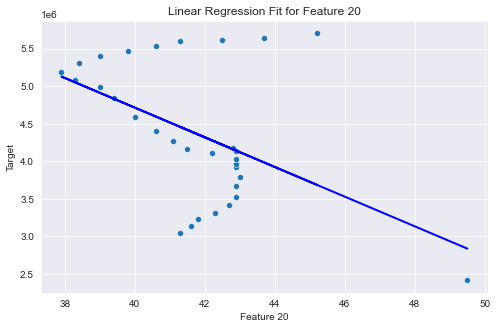

For Feature 21: Slope = -171177.50, Intercept = 9290709.07


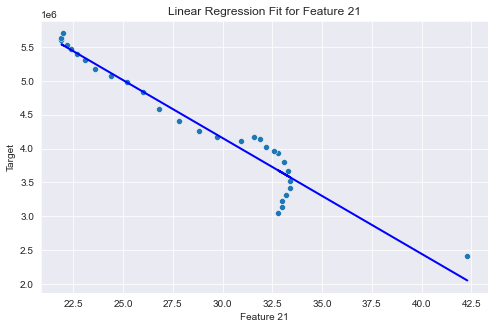

For Feature 22: Slope = 202977.31, Intercept = 1735486.30


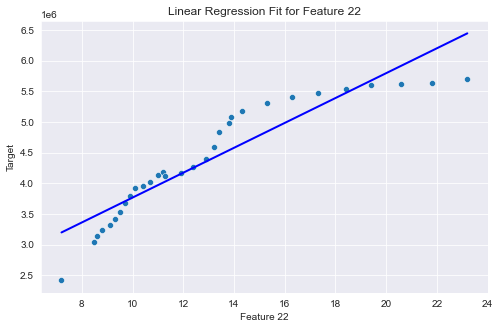

For Feature 23: Slope = -438867.69, Intercept = 7679643.65


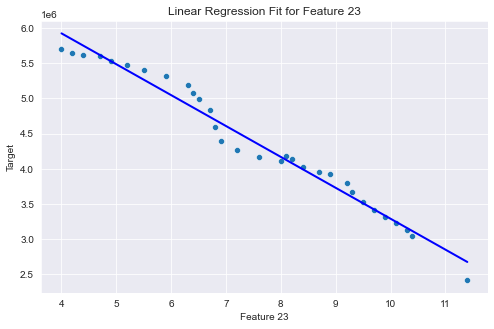

For Feature 24: Slope = -120526.39, Intercept = 11352566.65


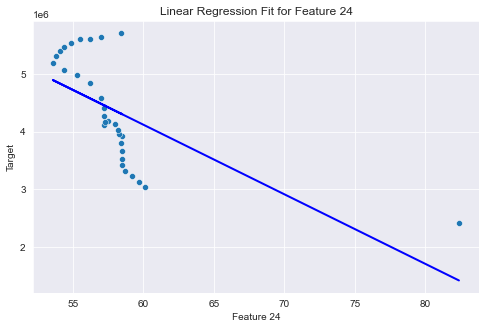

For Feature 25: Slope = -106563.74, Intercept = 9005458.11


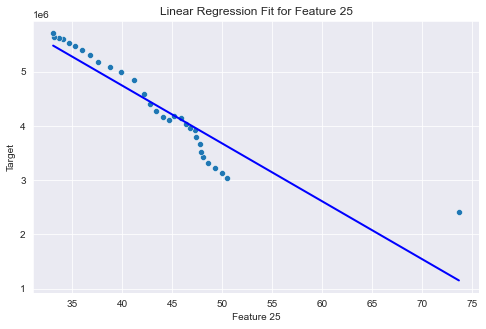

For Feature 26: Slope = 188026.57, Intercept = 1660129.74


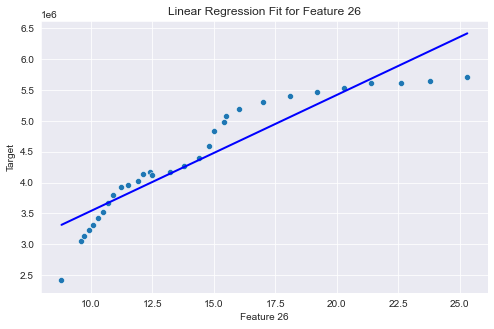

For Feature 27: Slope = -120.14, Intercept = 7313391.50


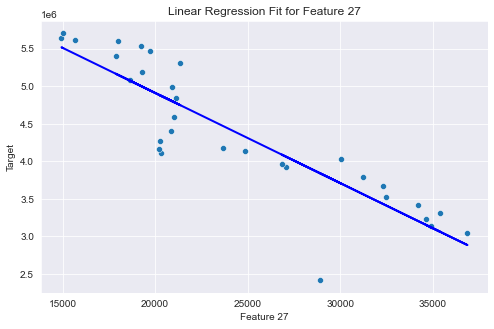

For Feature 28: Slope = -279105.10, Intercept = 6479101.96


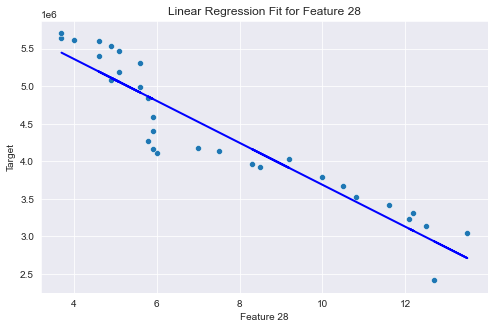

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each feature column in X_train
for i in range(X_train.shape[1]):
    feature_col = X_train.iloc[:, i]

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(feature_col.values.reshape(-1, 1), y_train)

    # Plotting the scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature_col, y=y_train)

    # Plotting the regression line
    plt.plot(feature_col, model.predict(feature_col.values.reshape(-1, 1)), color='blue', linewidth=2)

    # Adding labels and title
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Target')
    plt.title(f'Linear Regression Fit for Feature {i + 1}')

    # Print coefficients (slope and intercept) below the plot
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"For Feature {i + 1}: Slope = {slope:.2f}, Intercept = {intercept:.2f}")

    # Show each plot separately
    plt.show()



散点图矩阵:
其中对角线上是X每个特征元素与目标变量total population的散点图，非对角线上是X特征向量每一个元素之间的散点图。颜色深浅表示散点的密度，可以帮助观察特征向量X的每一个元素与目标变量total population之间的关系。

F:\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


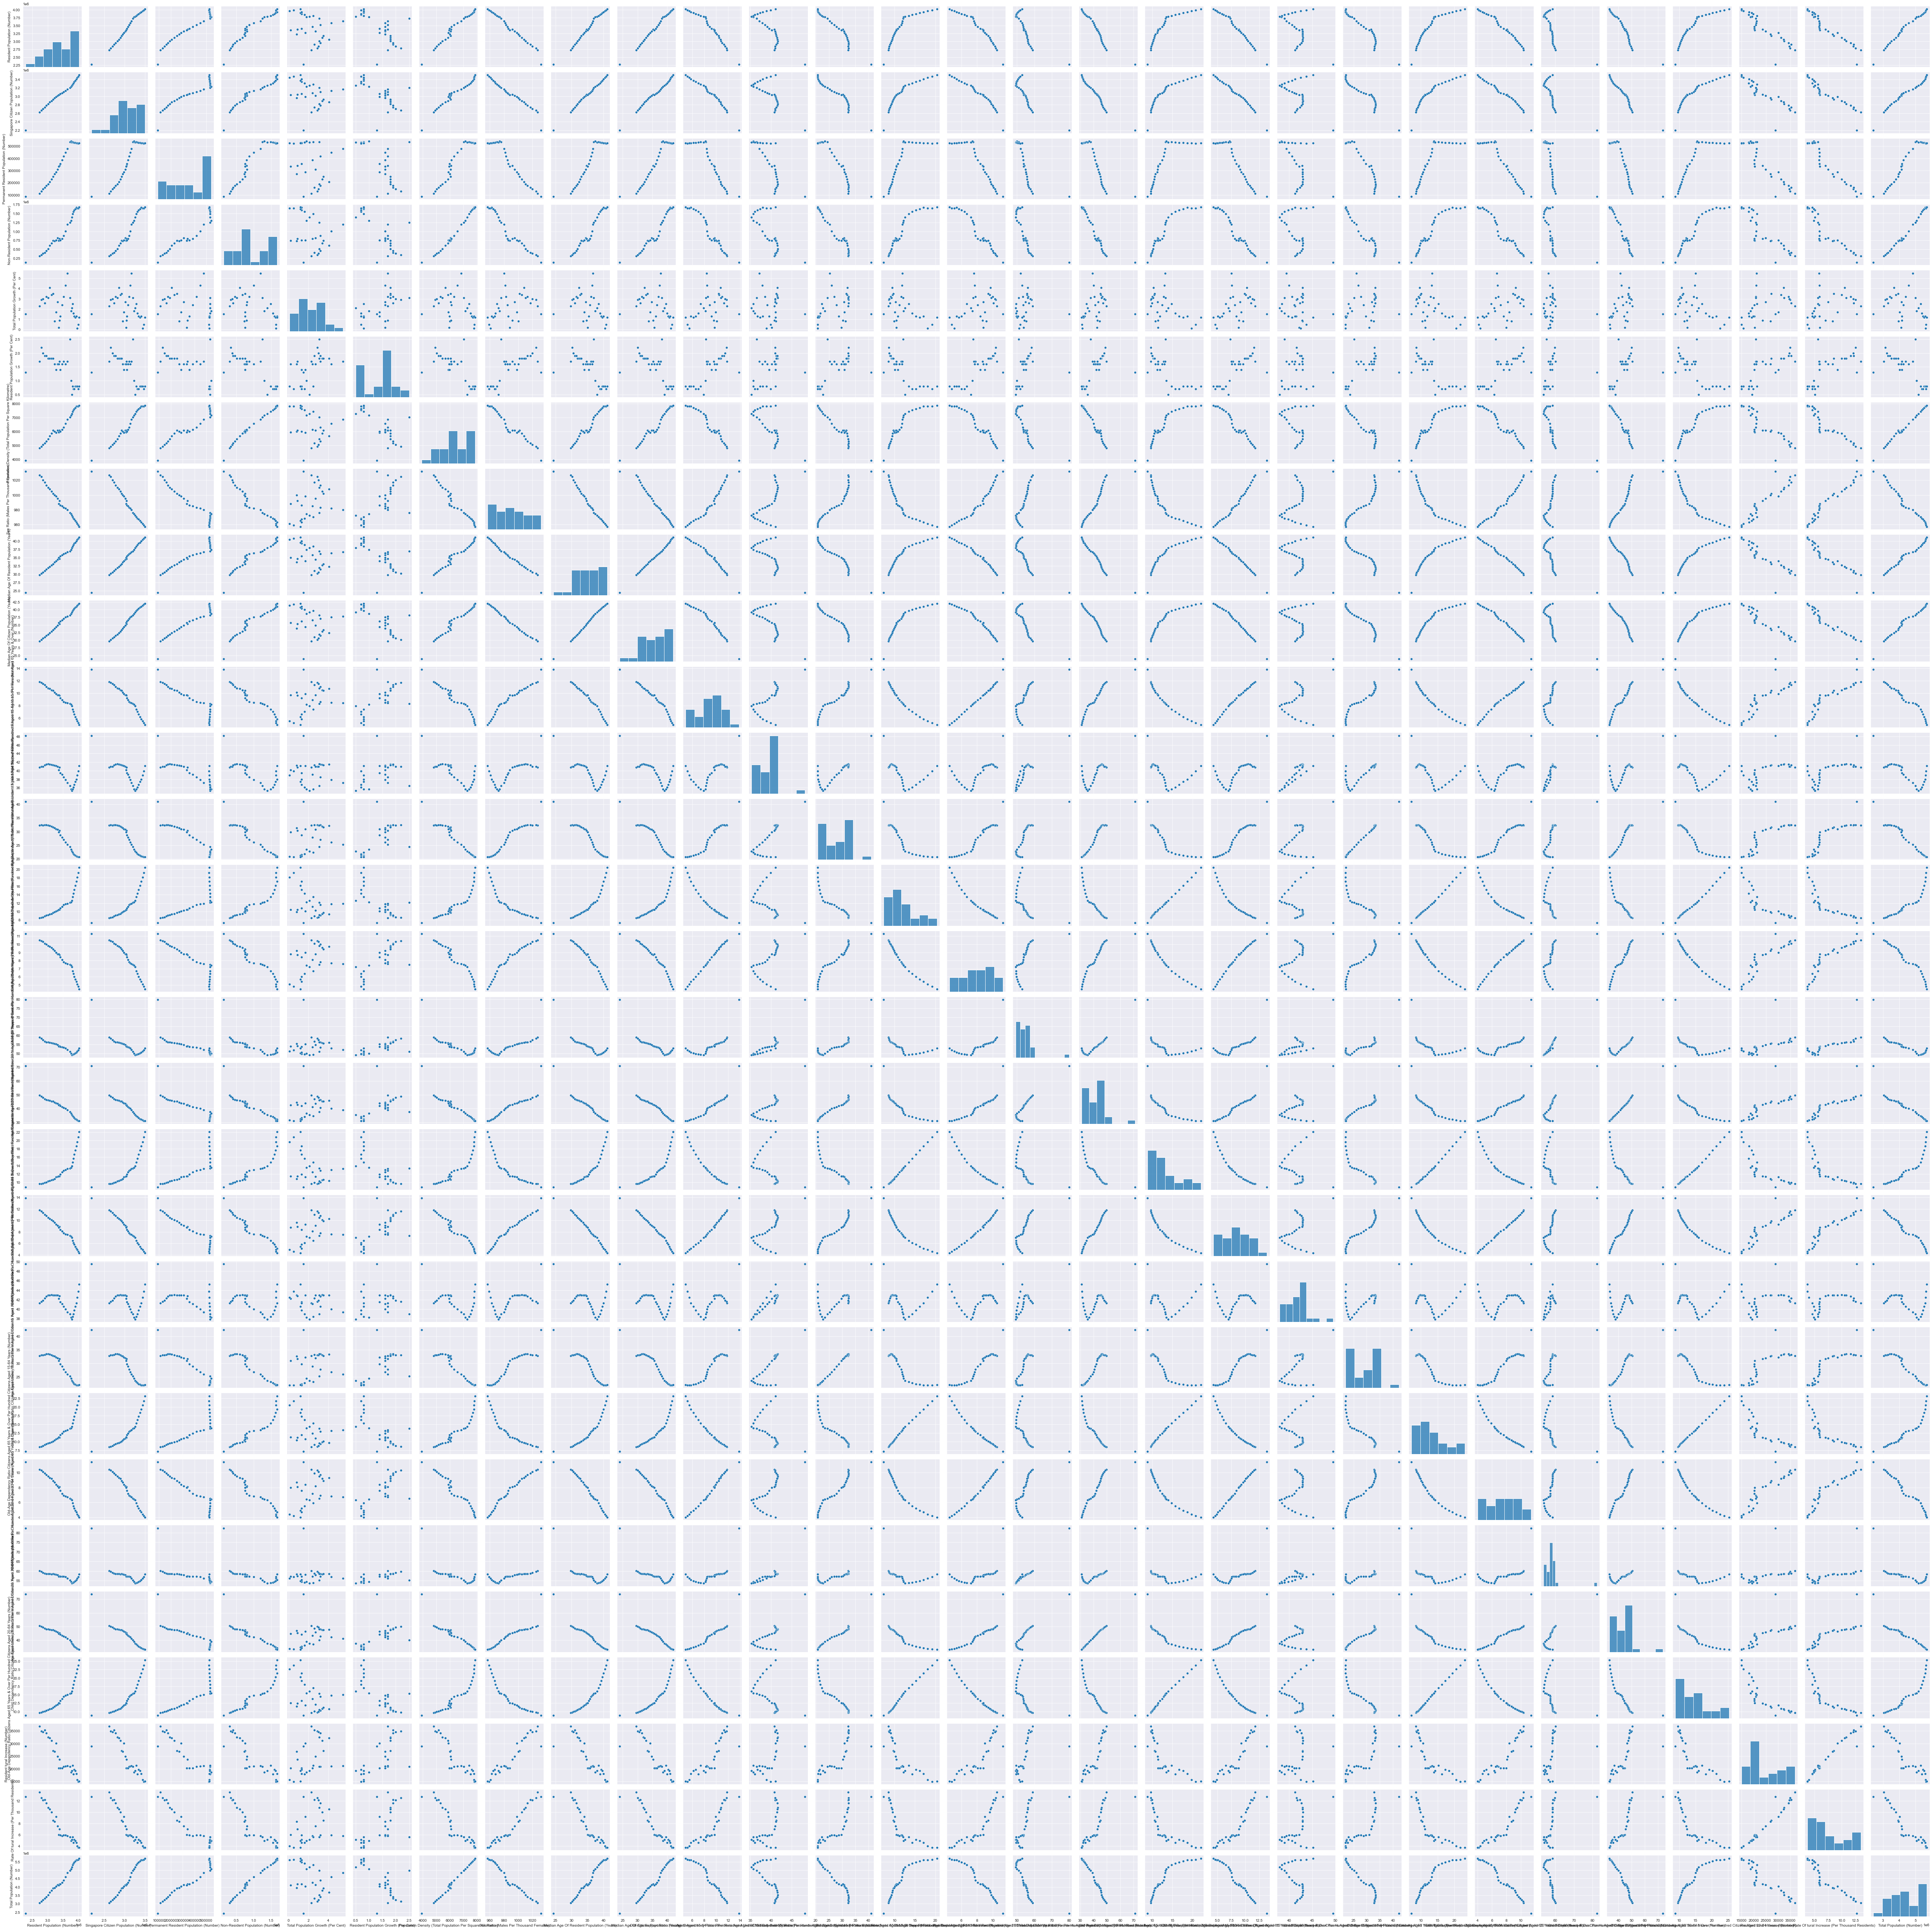

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target variable for visualization
df_visualization = pd.concat([X_train, y_train], axis=1)

# Plotting the scatter plot matrix
sns.pairplot(df_visualization)
plt.show()

3D 散点图:
可以选择三个特征绘制在三维空间中。这就需要在 3D 图上绘制点，其中横轴和纵轴分别是两个特征，高度则表示目标变量。

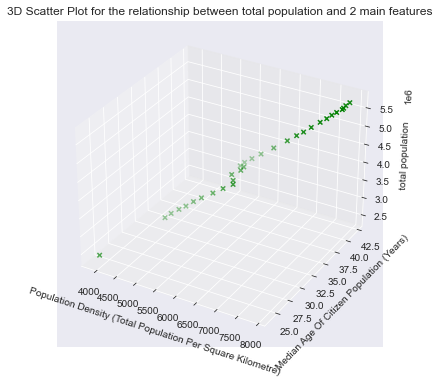

In [82]:
from mpl_toolkits.mplot3d import Axes3D

# Choose three features for 3D scatter plot
feature1 = X_train.columns[6] # 增长率
feature2 = X_train.columns[9] # 性别比例
feature3 = y_train

# Creating 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, c='green', marker='x')

# Adding labels and title
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('total population')
ax.set_title('3D Scatter Plot for the relationship between total population and 2 main features')

# Displaying the plot
plt.show()


R-squared
Square (value) is a statistical measure that represents the predictable ratio of variance in the dependent variable to the independent variable. It is a measure of the degree to which the independent variable explains the variability of the dependent variable.

The theoretical maximum value for R-squared is 1.0.

R值 (R-squared)
平方（值）是一种统计度量，表示因变量中的方差与自变量之间可预测的比例。它是自变量对因变量变异性的解释程度的度量。

In [73]:
r_squaredTrain = predictModel.score(X_train, y_train)
print('R^2 of Train set is:',r_squaredTrain)

R^2 of Train set is: 1.0


In [74]:
r_squaredTest = predictModel.score(X_test, y_test)
print('R^2 of Test set is:',r_squaredTest)

R^2 of Test set is: 1.0


R-squared now is equal to 1,very nice

以大于2020年的年份作为测试数据，并预测这些年份的人口。

In [75]:
# X_future = np.array(
#     [
#         [4044210, 3523191, 521019, 1641597, -0.3, 0.4, 7810, 957, 41.5, 42.2, 4.6, 42.3, 20.7, 21.6, 4.3, 54.0, 30.6,
#          23.4, 4.1, 46.8, 22.2, 24.6, 3.7, 59.7, 32.9, 26.8, 13248, 3.3],
#
#         [3986842, 3498191, 488651, 1466724, -4.1, -1.4, 7485, 960, 41.8, 42.5, 4.3, 43.9, 20.8, 23.1, 4.0, 55.4, 30.5,
#          24.9, 3.8, 48.7, 22.5, 26.2, 3.5, 61.4, 33.0, 28.5, 10913, 2.7],
#
#         [4073239, 3553749, 519490, 1563783, 3.4, 2.2, 7688, 955, 42.1, 42.8, 4.1, 44.8, 20.7, 24.1, 3.8, 56.3, 30.3,
#          26.0, 3.6, 50.0, 22.4, 27.6, 3.3, 62.7, 32.8, 29.9, 6704, 1.6]
#     ]
# )

# 获取最后三行不要前两列的数据
last_three_rows = np.genfromtxt(file_path, delimiter=',')
X_future = last_three_rows[-3:, 2:]

feature_names = X_train.columns
# 将 X_future 转换为一个带有正确列名的 DataFrame
X_future_df = pd.DataFrame(X_future, columns=feature_names)

y_future = predictModel.predict(X_future_df)

# 输出预测结果
print('(The prediction results of population during 2020 to 2022 are:)2020~2022的人口预测为：')
for prediction in y_future:
    print(int(prediction))

(The prediction results of population during 2020 to 2022 are:)2020~2022的人口预测为：
5685806
5453565
5637021


获取csv文件第一行各列名

In [76]:
import csv

# 指定CSV文件的路径
csv_file_path = 'singapore data.csv'

# 以只读方式打开CSV文件
with open(csv_file_path, 'r') as file:
    # 使用csv.reader读取文件内容
    csv_reader = csv.reader(file)

    # 获取第一行的元素
    first_row = next(csv_reader)

    # # 打印每个元素
    # for element in first_row:
    #     print(element)
first_row = first_row[1:]
# print(first_row)

Calculate the regression equation between the eigenvalues of each column in columns 2-30 and the eigenvalues of the first column separately (print out the equation to represent the parameters), and draw the fitting line

Set year to 202320302050 respectively, substitute {slope:. 4f} * year+{intercept:. 4f}, and write these 28 feature values into my_ In each row of the list


分别计算2~30列每一列的特征值与第1列特征值的回归方程（再print出方程表示出参数），并绘制拟合线

分别令年份year=2023,2030,2050，代入{slope:.4f} * 年份 + {intercept:.4f}，并把这28个特征值写入my_list的每一行中


Regression equation for 列 year: y = 67334.0769 * year + -130562088.0983
Regression equation for 列 Total Population (Number): y = 10506.6578 * year + -17633654.5165
Regression equation for 列 Resident Population (Number): y = 4597.3414 * year + -6070932.6705
Regression equation for 列 Singapore Citizen Population (Number): y = 1830.8229 * year + -3269920.2096
Regression equation for 列 Permanent Resident Population (Number): y = 9224.1839 * year + -17480303.2316
Regression equation for 列 Non-Resident Population (Number): y = -0.0397 * year + 81.3787
Regression equation for 列 Total Population Growth (Per Cent): y = -0.0061 * year + 13.5797
Regression equation for 列 Resident Population Growth (Per Cent): y = 58.6364 * year + -111274.8019
Regression equation for 列 Population Density (Total Population Per Square Kilometre): y = -2.4822 * year + 5961.2817
Regression equation for 列 Sex Ratio (Males Per Thousand Females): y = 0.3098 * year + -586.3309
Regression equation for 列 Median Age Of Resid

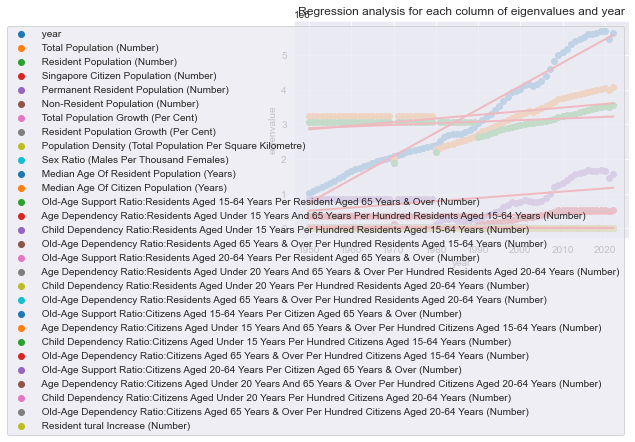

The list of prediction results:
[3621314.24833956, 3229488.8872146104, 433834.416894977, 1180220.8507160656, 0.9941780821917803, 1.1778246787724331, 7346.576983447492, 939.732876712329, 40.45460772104616, 38.359840182648384, 5.113138231631353, 29.82733499377332, 14.022109796596169, 15.805770029057669, 4.999974055624762, 38.64599418846001, 21.43959111664617, 17.206278538812796, 6.855433789954333, 41.91977168949772, 25.654292237442945, 16.274520547945187, 6.2038127853881235, 56.52979452054794, 38.61614155251141, 17.926826484018278, 13991.825342465774, -1.8408675799087177]
[3694860.853062276, 3261670.2766876444, 446650.17684808094, 1244790.138197977, 0.7160310995927404, 1.1349115601743822, 7757.031581667281, 922.3572750833027, 42.623415569990925, 38.83386400098729, 3.6514141788114216, 25.488034734609982, 8.502828357622775, 16.98556763488267, 3.8771599744202376, 31.296382933369387, 12.885410566232622, 18.411970874984547, 6.589164506972722, 41.64837714426757, 24.939158336418615, 16.71780821

In [84]:
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = np.genfromtxt('singapore data.csv', delimiter=',', skip_header=1)

# 创建一个简单的缺失值填充器，使用均值填充
imputer = SimpleImputer(strategy='mean')
# 对每一列进行填充
data = imputer.fit_transform(data)

# 获取年份列
years = data[:, 0]

#获取csv文件列数——28
num_columns = data.shape[1]

# 创建一个3*28的二维list，存放2023,2030,2050年的所有特征值
py_list = [[0 for _ in range(num_columns-2)] for _ in range(3)]

# 遍历每一列进行回归分析
for col in range(1, data.shape[1]):
    # 获取当前列的特征值
    feature_values = data[:, col]

    # 使用线性回归模型拟合数据
    model = LinearRegression().fit(years.reshape(-1, 1), feature_values)

    # 获取回归方程的参数
    slope = model.coef_[0]
    intercept = model.intercept_

    # 打印回归方程
    print(f"Regression equation for 列 {first_row[col - 1]}: y = {slope:.4f} * year + {intercept:.4f}")

    # 代入年份并计算预测值，然后将值写入my_list的每一行
    for i, year in enumerate([2023, 2030, 2050]):
        predicted_value = slope * year + intercept
        py_list[i][col - 2] = predicted_value

    # 绘制拟合线
    plt.scatter(years, feature_values, label=f' {first_row[col - 1]}')
    plt.plot(years, model.predict(years.reshape(-1, 1)), color='red', linewidth=2)

# 显示图例和图形
plt.legend()
plt.xlabel('year')
plt.ylabel('eigenvalue')
plt.title('Regression analysis for each column of eigenvalues and year')
plt.show()

# 打印py_list
print("The list of prediction results:")
for row in py_list:
    print(row)


对新加坡2023年、2030年和2050年人口的估计是多少？

In [78]:
# residualError = 1e6

In [79]:
# 转换为DataFrame
new_data_df = pd.DataFrame(py_list)
# print(new_data_df)
# 使用训练好的模型进行预测
predicted_population = predictModel.predict(new_data_df)
precautionP = [int(value) for value in predicted_population]
# 打印预测结果
for i, year in enumerate([2023, 2030, 2050]):
    print(f"Predict {year}'s totalPopulation of Singapore is: {precautionP[i]}")

# 5637022

Predict 2023's totalPopulation of Singapore is: 5801535
Predict 2030's totalPopulation of Singapore is: 5939650
Predict 2050's totalPopulation of Singapore is: 6334267


F:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


把预测结果写到新csv文件中

In [80]:
import csv

# 从第一个CSV文件中读取第一行数据
with open('singapore data.csv', 'r') as first_file:
    reader = csv.reader(first_file)
    first_row = next(reader)

# 从pylist中获取要写入的数据
# 创建一个3x30的二维列表
result_list = []

# 每行的第一列写入2023、2030、2050
years = [2023, 2030, 2050]

# 第二列写入总人口

# print(precautionP)
# 第3至30列写入一个3x28的二维列表的所有元素
# 构建结果列表
for i in range(3):
    row = [years[i % 3], precautionP[i % 3]]
    for element in py_list[i % 3]:
        row.append(element)
    # print(row)
    # print("================================================================")
    result_list.append(row)

# # 打印结果列表
# for row in result_list:
#     print(row)

# 将数据写入到新的CSV文件中
with open('prediction_fileSingapore.csv', 'w', newline='') as output_file:
    writer = csv.writer(output_file)

    # 写入第一行数据
    writer.writerow(first_row)

    # 写入第2至4行的数据
    writer.writerows(result_list)

print("CSV file has already created and data are written in CSV successfully.")


CSV file has already created and data are written in CSV successfully.


查看csv

In [81]:
import csv

# 读取CSV文件内容并打印
with open('prediction_fileSingapore.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['year', 'Total Population (Number)', 'Resident Population (Number)', 'Singapore Citizen Population (Number)', 'Permanent Resident Population (Number)', 'Non-Resident Population (Number)', 'Total Population Growth (Per Cent)', 'Resident Population Growth (Per Cent)', 'Population Density (Total Population Per Square Kilometre)', 'Sex Ratio (Males Per Thousand Females)', 'Median Age Of Resident Population (Years)', 'Median Age Of Citizen Population (Years)', 'Old-Age Support Ratio:Residents Aged 15-64 Years Per Resident Aged 65 Years & Over (Number)', 'Age Dependency Ratio:Residents Aged Under 15 Years And 65 Years Per Hundred Residents Aged 15-64 Years (Number)', 'Child Dependency Ratio:Residents Aged Under 15 Years Per Hundred Residents Aged 15-64 Years (Number)', 'Old-Age Dependency Ratio:Residents Aged 65 Years & Over Per Hundred Residents Aged 15-64 Years (Number)', 'Old-Age Support Ratio:Residents Aged 20-64 Years Per Resident Aged 65 Years & Over (Number)', 'Age Dependency Ratio:R

====================================================================================================================================

<img src="G:\Artificial-Intelligence-and-Machine-Learning-2024-Jan-18_08-39-43-407\viewer\files\02. Class-Material\4-Project\屏幕截图 2024-01-22 115115.png" style="width: 100px;"/>

I think this prediction is a bit low. We underestimated the population in 2030 and 2050 because based on population growth trends and Singapore's dependency ratio of young and elderly children, population growth will not stop quickly.

我认为这个预测结果有些偏低了，我们低估了2030和2050年的人口，因为依照人口增长趋势以及新加坡的幼儿和老年人抚养比来看，人口增长不会较快停止。

Ridge Regression:
Applicable situation: Ridge regression is usually more effective than linear regression when there is collinearity (high correlation between independent variables). It prevents overfitting by introducing regularization terms.
Usage example: When the dataset contains highly correlated features.
Python

From sklearn.linear_ Model import ridge
Model=Ridge()
Lasso regression:
Applicable situation: Similar to ridge regression, used to handle collinearity. Lasso regression also tends to make the coefficients of some features zero, thus achieving feature selection.
Usage example: When you want to improve the interpretability of the model by automatically selecting important features.
Python

From sklearn.linear_ Model import Lasso
Model=Lasso()
Elastic Net Regression:
Applicable situation: Combining the advantages of ridge regression and Lasso regression, it can handle collinearity and achieve feature selection.
Usage example: When facing high-dimensional datasets and wanting to combine L1 and L2 regularization.
Python

From sklearn.linear_ Model import ElasticNet
Model=ElasticNet()

Decision Tree Regression:
Applicable situation: Decision tree regression is a good choice when the relationship is non-linear, there are interactions, or the data contains discrete features.
Usage example: When the data has non-linear relationships, or when you want the model to automatically capture the interaction between features.
Python

From sklearn.tree import DecisionTreeRegressor
Model=DecisionTreeRegressor()
Random Forest Regression:
Applicable situation: Random forest is an integrated model of decision trees, which usually has good robustness to overfitting and is suitable for complex nonlinear relationships.
Usage example: When you want to combine multiple decision trees to improve the performance of the model.
Python

From sklearn. ensemble import RandomForestRegression
Model=RandomForestRegister()
Support Vector Machine Regression (SVR):
Applicable situation: Suitable for nonlinear relationships, especially in high-dimensional spaces.
Usage example: When your data has complex nonlinear structures.
Python
Copy code
From sklearn.svm import SVR
Model=SVR()

岭回归（Ridge Regression）：

适用情况： 当存在共线性（自变量之间存在高度相关）时，岭回归通常比线性回归更有效。它通过引入正则化项来防止过拟合。
使用示例： 当数据集中包含高度相关的特征时。
python

from sklearn.linear_model import Ridge
model = Ridge()
Lasso回归：

适用情况： 类似于岭回归，用于处理共线性。Lasso回归还倾向于使得一些特征的系数变为零，从而实现特征选择。
使用示例： 当你希望通过自动选择重要特征来提高模型的解释性时。
python

from sklearn.linear_model import Lasso
model = Lasso()
弹性网络回归（Elastic Net Regression）：

适用情况： 结合了岭回归和Lasso回归的优点，既能处理共线性，又能实现特征选择。
使用示例： 当你面对高维数据集并且希望结合L1和L2正则化时。
python

from sklearn.linear_model import ElasticNet
model = ElasticNet()
决策树回归：

适用情况： 当关系非线性、存在交互作用或者数据包含离散特征时，决策树回归是一种很好的选择。
使用示例： 当数据具有非线性关系时，或者你希望模型能够自动捕捉特征之间的交互作用。
python

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
随机森林回归：

适用情况： 随机森林是决策树的集成模型，通常对过拟合有很好的鲁棒性，适用于复杂的非线性关系。
使用示例： 当你希望结合多个决策树来提高模型的性能时。
python

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
支持向量机回归（SVR）：

适用情况： 适用于非线性关系，尤其是在高维空间中。
使用示例： 当你的数据具有复杂的非线性结构时。
python

from sklearn.svm import SVR
model = SVR()